# Con datos o no, lo primero es la historia

### Noticia
* Responde qué, cómo, cuándo, quiénes.
* Está muy ligada a su temporalidad.
* No se interesa por profundizar en un fenómeno.

<div class="naked-img">
    <img src="../files/crash.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

### Reportaje
* Aborda varias aristas de un fenómeno noticioso
* No pierde tan rápido su importancia en el tiempo,  
  aunque tenga temporalidad
* Lo que le interesa es la complejidad del fenómeno y 
  no solo los hechos


<div class="naked-img">
    <img src="../files/cars_data.JPG" width="400">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

## La caja de herramientas del periodista

<div class="naked-img">
    <img src="../files/toolbox.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

* Fuentes
* Documentos
* Datos

## El esqueleto de la historia periodística

<div class="naked-img">
    <img src="../files/esqueleto_historia.jpg" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

## ¿Qué preguntas quiero responder?

Esto es vital:

-Nos guía durante la búsqueda \
-Nos pone un objetivo que debemos buscar \
-Siempre empiecen por una pregunta periodística -> datos -> regresen y agreguen más preguntas

* ¿Cuáles fueron los municipios más importantes en ambas elecciones? ¿Y los departamentos?
* ¿Tenemos algún indicio de fraude?
* ¿Hubo algún comportamiento irregular?
* ¿Hay una relación entre el plebiscito y la consulta liberal?
* ¿Cómo votaron los municipios más pobres y los que tienen más violencia?
* En los municipios donde tienen más acceso a internet, ¿quién ganó? ¿Por qué?

## Fuentes de datos: ¿De dónde saco datos?

El equivalente a una primera búsqueda en Google en el periodismo de datos son los **datasets públicos**. Estos, en particular, vienen de la [Registraduría](https://wsr.registraduria.gov.co/-Partido-Liberal-.html)

<div class="naked-img">
    <img src="../files/dataset.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

## Data Wrangling 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_liberal = pd.read_csv("../periodismo_datos_101/data/liberal_plebi/consulta_liberal_cod.csv")

In [2]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
0,1,ANTIOQUIA,1,MEDELLIN,"4,259","12,523","1,237",360,"18,379",antioquia_medellin,05_5001.0,100,5,5001,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,-,10,antioquia_abriaqui,05_5004.0,100,5,5004,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,-,1,50,antioquia_alejandria,05_5021.0,100,5,5021,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,-,128,antioquia_amaga,05_5030.0,100,5,5030,5,5030


In [ ]:
df_liberal.iloc[]

In [3]:
df_liberal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cd                    1123 non-null   int64 
 1   departamento          1123 non-null   object
 2   cm                    1123 non-null   int64 
 3   municipio             1123 non-null   object
 4   juan_fernando_cristo  1123 non-null   object
 5   humberto_de_la_calle  1123 non-null   object
 6   votos_nulos           1123 non-null   object
 7   votos_no_marcados     1123 non-null   object
 8   total_votos           1123 non-null   object
 9   nom_dep_mun           1123 non-null   object
 10  cod_dep_mun           1123 non-null   object
 11  closeness             1123 non-null   int64 
 12  cod_dep               1123 non-null   int64 
 13  cod_mun               1123 non-null   int64 
 14  cod_dep1              1123 non-null   int64 
 15  cod_mun1              1123 non-null   

In [4]:
def clean(x):
    resp = int(x.replace(',','').replace('-','0').strip())
    return resp

In [5]:
# Limpiar
for column in df_liberal.columns[4:9]:
    df_liberal[column] = df_liberal[column].apply(clean)

In [6]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,0,1,50,antioquia_alejandria,05_5021.0,100,5,5021,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,0,128,antioquia_amaga,05_5030.0,100,5,5030,5,5030


## Exploratory Data Analysis (EDA)

In [7]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,0,1,50,antioquia_alejandria,05_5021.0,100,5,5021,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,0,128,antioquia_amaga,05_5030.0,100,5,5030,5,5030


In [8]:
df_liberal.describe()

,cd,cm,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,19.042743,111.634907,289.204809,325.608192,36.474622,11.687444,662.975067,96.647373,36.571683,37012.286732,36.571683,37012.286732
std,14.403900,132.696322,1143.146400,1256.985333,149.834401,49.470902,2209.532263,14.633806,26.050188,26012.851442,26.050188,26012.851442
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,7.000000,28.000000,18.000000,22.000000,3.000000,1.000000,72.000000,100.000000,15.000000,15515.000000,15.000000,15515.000000
50%,16.000000,70.000000,70.000000,62.000000,8.000000,3.000000,189.000000,100.000000,25.000000,25736.000000,25.000000,25736.000000
75%,27.000000,150.000000,242.000000,194.500000,20.000000,8.000000,487.500000,100.000000,63.000000,63120.500000,63.000000,63120.500000
max,72.000000,900.000000,26049.000000,24882.000000,3244.000000,714.000000,38073.000000,100.000000,99.000000,99773.000000,99.000000,99773.000000


### Funciones útiles y rápidas
* value_counts()
* max()/min()/mean()
* unique()/drop_duplicates()


In [9]:
df_liberal.departamento

0       ANTIOQUIA
1       ANTIOQUIA
2       ANTIOQUIA
3       ANTIOQUIA
4       ANTIOQUIA
          ...    
1118       VAUPES
1119      VICHADA
1120      VICHADA
1121      VICHADA
1122      VICHADA
Name: departamento, Length: 1123, dtype: object

In [10]:
import seaborn as sns
df_liberal.head(3)

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004,5,5004


* [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


* [Displot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

* [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

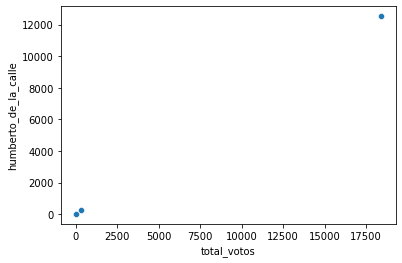

In [11]:
sns.scatterplot(data=df_liberal.head(3), 
                x="total_votos", 
                y="humberto_de_la_calle")

In [12]:
x = "total_votos"
size= None

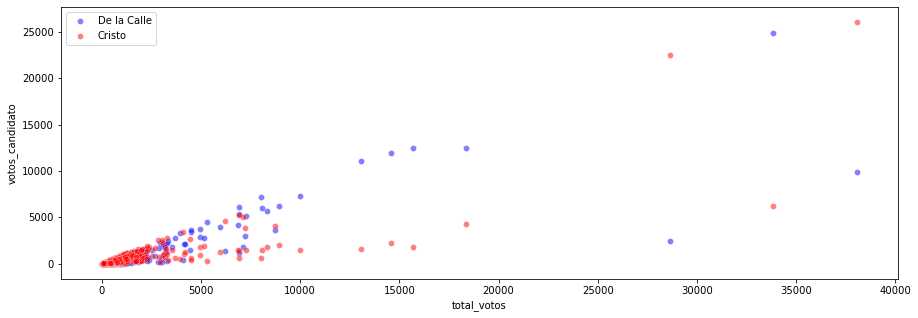

In [13]:
#resp_scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.scatterplot(data=df_liberal, 
                x=x, 
                y="humberto_de_la_calle",
                alpha=0.5, 
                size=size,
                color='blue',
                label='De la Calle',
               ax=ax)
sns.scatterplot(data=df_liberal, 
                x=x, 
                y="juan_fernando_cristo",
                size=size,
                alpha=0.5, 
                color='red',
                label='Cristo',
               ax=ax)

plt.legend()
plt.ylabel('votos_candidato')
plt.show()

### Retomemos las preguntas...

* ¿Cuáles fueron los departamentos más importantes en ambas elecciones? ¿Y los municipios?

Veamos [lo que dijo](https://lasillavacia.com/cinco-conclusiones-de-la-consulta-liberal-63522) La Silla Vacía. 

### Vamos a reconstruir sus pasos

In [14]:
temp = pd.pivot_table(index='departamento', 
                      aggfunc={'juan_fernando_cristo':'sum', 'humberto_de_la_calle':'sum','total_votos':'sum'}, 
                      data=df_liberal).reset_index()

In [15]:
temp.sort_values(by='total_votos',ascending=False).head(5)

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos
4,BOGOTA D.C.,75144,16021,100106
1,ANTIOQUIA,38818,31633,75893
30,VALLE,47458,21202,74631
3,ATLANTICO,29084,38997,71093
22,NORTE DE SANTANDER,3798,39002,48111


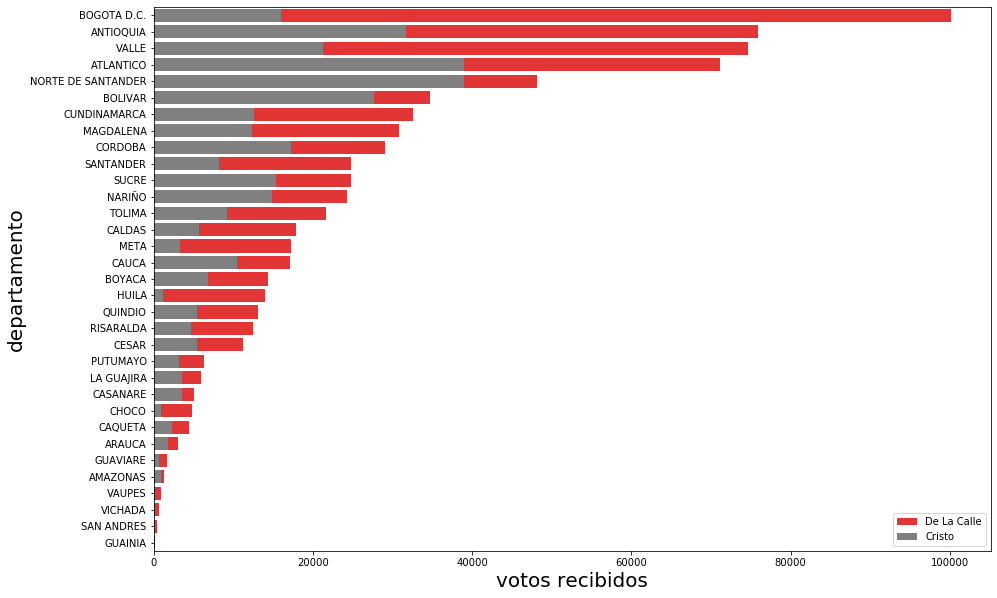

In [16]:
#plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
sns.barplot(y='departamento',
            x='total_votos',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='red',
            label='De La Calle',
            alpha=0.9,
            ax=ax)

ax.tick_params(axis='x',
               labelrotation=0)

sns.barplot(y='departamento',
            x='juan_fernando_cristo',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='grey',
            label='Cristo',
            alpha=1,
            ax=ax)
ax.set_ylabel('departamento',fontsize=20)
ax.set_xlabel('votos recibidos',fontsize=20)
ax.legend()
plt.show()

### ¿Alguien vio el error?

In [18]:
temp['dif_abs'] = temp.humberto_de_la_calle - temp.juan_fernando_cristo

In [19]:
temp.sort_values(by='dif_abs',ascending=False).head()

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
4,BOGOTA D.C.,75144,16021,100106,59123
30,VALLE,47458,21202,74631,26256
17,HUILA,11481,1228,13949,10253
20,META,12005,3340,17272,8665
1,ANTIOQUIA,38818,31633,75893,7185


In [20]:
temp.sort_values(by='dif_abs',ascending=False).tail()

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
21,NARIÑO,8255,14801,24293,-6546
28,SUCRE,8582,15341,24799,-6759
3,ATLANTICO,29084,38997,71093,-9913
5,BOLIVAR,5876,27639,34706,-21763
22,NORTE DE SANTANDER,3798,39002,48111,-35204


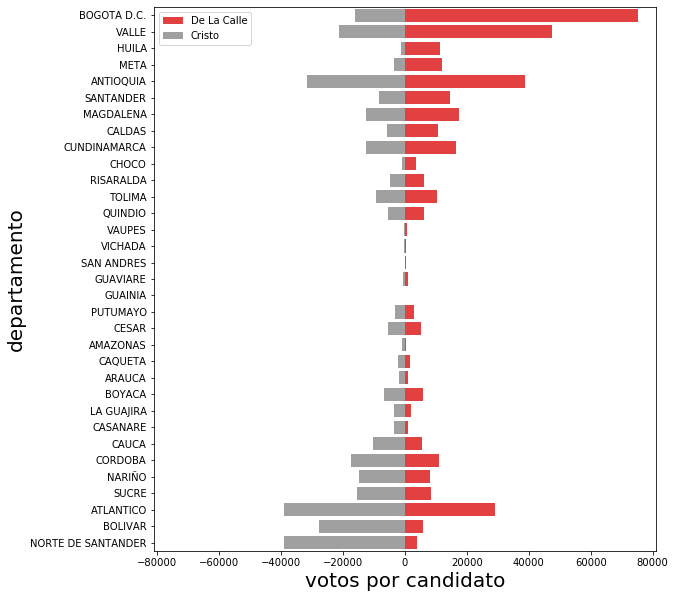

In [21]:
#plot_difs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,10))
ax = plt.subplot(1,1,1)
sns.barplot(y='departamento',
            x='humberto_de_la_calle',
            data=temp.sort_values(by='dif_abs',
                                  ascending=False),
            label="De La Calle",
            color="red",
            alpha=0.85,
            ax=ax)
sns.barplot(y=temp.sort_values(by='dif_abs',ascending=False)['departamento'],
            x=temp.sort_values(by='dif_abs',ascending=False)["juan_fernando_cristo"]*-1,
            label="Cristo",
            alpha=0.75,
            color="grey",
            ax=ax)
ax.set_ylabel('departamento',fontsize=20)
ax.set_xlabel('votos por candidato',fontsize=20)
ax.set_xlim(-81000,81000)
ax.legend()

### ¿Cómo resolverían la pregunta para los municipios?

In [34]:
temp_mun = pd.pivot_table(index=['departamento','municipio'], 
                          aggfunc={'juan_fernando_cristo':'sum', 'humberto_de_la_calle':'sum','total_votos':'sum'}, 
                          data=df_liberal).reset_index()

In [35]:
temp_mun['dif_abs'] = temp_mun.humberto_de_la_calle - temp_mun.juan_fernando_cristo

In [36]:
temp_mun.sort_values(by='dif_abs',ascending=False).head()

,departamento,municipio,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
1083,VALLE,CALI,24882,6206,33819,18676
173,BOGOTA D.C.,SUBA,12525,1815,15689,10710
735,MAGDALENA,SANTA MARTA,11926,2213,14585,9713
177,BOGOTA D.C.,USAQUEN,11094,1574,13053,9520
70,ANTIOQUIA,MEDELLIN,12523,4259,18379,8264


In [37]:
temp_mun.sort_values(by='dif_abs',ascending=False).tail()

,departamento,municipio,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
1023,SUCRE,SINCELEJO,1774,5015,7132,-3241
520,CORDOBA,MONTERIA,1371,4612,6206,-3241
1114,VALLE,YUMBO,1202,5297,6897,-4095
135,ATLANTICO,BARRANQUILLA,9935,26049,38073,-16114
842,NORTE DE SANTANDER,CUCUTA,2445,22469,28624,-20024


### Hagamos un par de ejercicios

### ¿Cuál es el departamento con más municipios donde ganó Humberto de la Calle?

### ¿Qué departamento le es más fiel a Juan Fernando Cristo? ¿Y municipio?

### ¿En qué departamento fue donde más saboteron la consulta? ¿Por qué vale la pena perseguir esos inidicios?

# Pequeño resumen del módulo

### Aprendimos...
* El reportaje se preocupa por el fenómeno estructural y no solo por los hechos
* Los datos son una herramienta y primero va la historia
* Nuestra reportería va dirigida por preguntas: planteamos preguntas, exploramos los datos y volvemos a empezar

### Aprendimos...
* Seaborn es una librería para hacer visualizaciones estadísticas muy útil
* Cuando crea resolver una pregunta debo pensar cómo podría falsear la respuesta
* A veces sirve pensar en términos relativos, otras veces en absolutos. Debo explorar varios caminos